# Project Title: Sentiment Analysis on Amazon Product Reviews

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import string

nltk.download('stopwords')
nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
df = pd.read_csv("amazon.csv")

In [57]:
df.sample(10)

,reviewText,Positive
4598,This app will not run on an Android. I was go...,0
19557,This reader is SO much better than Google's - ...,1
10375,This has been very helpful to me. There are s...,1
2882,I got this app on my kindle fire and it works ...,1
13488,ive never played diner dash...but ive seen pic...,1
11557,This is so great! I love the way you can easil...,1
14210,As this is a application organizer what busine...,0
11766,First off I want to clarify my device so other...,1
18318,THIS WAS THE BIGGEST TIME WASTER EVER IT SUCKE...,0
1532,The Twitter app is good if you like to spend t...,1


In [58]:
df = df.rename(columns={'Positive' : 'score'})

In [59]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

In [60]:
def des_analysis(dataframe):
    methods = {
        "shape": lambda: print(dataframe.shape),
        "columns": lambda: print(dataframe.columns),
        "info": lambda: print(dataframe.info()),
        "Descriptive": lambda: print(dataframe.describe().T),
        "Null_values": lambda: print(dataframe.isnull().sum()),
        "Unique_Values": lambda: print(dataframe.nunique()),
        "Data_types": lambda: print(dataframe.dtypes),
        "Duplicate_Values": lambda: print(dataframe.duplicated().sum())
    }
    for method in methods:
        print(
            f"---------------------------- {method} ------------------------------------------\n"
        )
        if method in methods:
            methods[method]()
            print("\n")

In [61]:
des_analysis(df)

---------------------------- shape ------------------------------------------

(20000, 2)


---------------------------- columns ------------------------------------------

Index(['reviewText', 'score'], dtype='object')


---------------------------- info ------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   score       20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB
None


---------------------------- Descriptive ------------------------------------------

         count     mean       std  min  25%  50%  75%  max
score  20000.0  0.76165  0.426085  0.0  1.0  1.0  1.0  1.0


---------------------------- Null_values ------------------------------------------

reviewText    0
score         0
dtype: int64


---------------------------- Unique_

<Axes: >

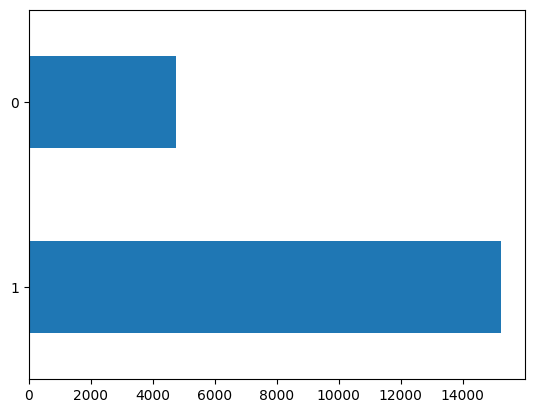

In [62]:
df.score.value_counts().plot(kind='barh')

In [63]:
st = set(stopwords.words('english'))


In [64]:
def preprocess_text(text):
    try:
        # Check if the input is a string
        if isinstance(text, str):
            # Remove punctuation
            text = text.translate(str.maketrans("", "", string.punctuation))

            # Tokenize the text
            tokens = word_tokenize(text)

            # Remove stopwords
            stop_words = set(stopwords.words('english'))
            tokens = [word for word in tokens if word.lower() not in stop_words]

            # Join the tokens back into a string
            processed_text = ' '.join(tokens)

            return processed_text
        else:
            return ""
    except Exception as e:
        print(f"An error occurred: {e}")
        return ""

In [65]:
df['reviewText'] = df['reviewText'].apply(preprocess_text)

In [66]:
df['reviewText']

0        one best apps acording bunch people agree bomb...
1        pretty good version game free LOTS different l...
2        really cool game bunch levels find golden eggs...
3        silly game frustrating lots fun definitely rec...
4        terrific game pad Hrs fun grandkids love Great...
                               ...                        
19995    app fricken stupidit froze kindle wont allow p...
19996    Please add need neighbors Ginger1016 thanks bu...
19997    love game awesome wish free stuff houses didnt...
19998    love love love app side fashion story fights w...
19999    game rip list things MAKE BETTERbull First NEE...
Name: reviewText, Length: 20000, dtype: object

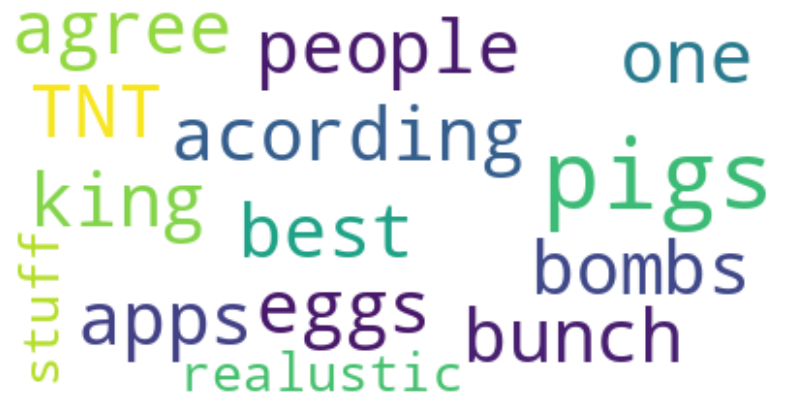

In [67]:
#https://www.datacamp.com/tutorial/wordcloud-python
# Start with one review:
text = df.reviewText[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [68]:
x = df.drop(['score'], axis=1)
y = df['score']

x = x.values.ravel()

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((16000,), (16000,), (4000,), (4000,))

# CountVactorizer

In [71]:
#countvactorizer
count_v = CountVectorizer(max_features=10000)
#count_v.fit(xtrain)

cv_xtrain = count_v.fit_transform(xtrain)
cv_xtest = count_v.transform(xtest)

cv_xtrain, cv_xtest

(<16000x10000 sparse matrix of type '<class 'numpy.int64'>'
 	with 239572 stored elements in Compressed Sparse Row format>,
 <4000x10000 sparse matrix of type '<class 'numpy.int64'>'
 	with 58694 stored elements in Compressed Sparse Row format>)

# TfidfVactorizer

In [72]:
#TfidfVectorizer
tfidf_vactorizer = TfidfVectorizer(max_features=10000)
tfidf_vactorizer.fit(xtrain)

tfidf_xtrain = tfidf_vactorizer.transform(xtrain)
tfidf_xtest = tfidf_vactorizer.transform(xtest)

tfidf_xtrain, tfidf_xtest

(<16000x10000 sparse matrix of type '<class 'numpy.float64'>'
 	with 239572 stored elements in Compressed Sparse Row format>,
 <4000x10000 sparse matrix of type '<class 'numpy.float64'>'
 	with 58694 stored elements in Compressed Sparse Row format>)

In [73]:
#train_and_test
def train_And_test(model, xtrain, ytrain, xtest, ytest):
  model.fit(xtrain, ytrain)  #[:, None]
  y_pred_train = model.predict(xtrain)
  y_pred_xtest = model.predict(xtest)
  print()
  print(model)
  print(f"Train Accuracy Score : {accuracy_score(ytrain, y_pred_train)}")
  print(f"Test Accuracy Score : {accuracy_score(ytest, y_pred_xtest)}")
  print(f"Train Precision Score : {precision_score(ytrain, y_pred_train)}")
  print(f"Test Precision Score : {precision_score(ytest, y_pred_xtest)}")
  print(f"Train Recall Score : {recall_score(ytrain, y_pred_train)}")
  print(f"Test Recall Score : {recall_score(ytest, y_pred_xtest)}")
  print(f"Train F1 Score : {f1_score(ytrain, y_pred_train)}")
  print(f"Test F1 Score : {f1_score(ytest, y_pred_xtest)}")
  print(f"Train Confision Matrix : {confusion_matrix(ytrain, y_pred_train)}")
  print(f"Test Confusion Matrix : {confusion_matrix(ytest, y_pred_xtest)}")
  print('\n',20*'-')


# countvactorizer

In [74]:
#logisticregression
lr = LogisticRegression()
train_And_test(model=lr, xtrain=cv_xtrain, ytrain=ytrain, xtest=cv_xtest, ytest=ytest)


LogisticRegression()
Train Accuracy Score : 0.9684375
Test Accuracy Score : 0.892
Train Precision Score : 0.9726581459310791
Test Precision Score : 0.9185375240538807
Train Recall Score : 0.9863013698630136
Test Recall Score : 0.9414858645627876
Train F1 Score : 0.9794322486050584
Test F1 Score : 0.9298701298701298
Train Confision Matrix : [[ 3471   338]
 [  167 12024]]
Test Confusion Matrix : [[ 704  254]
 [ 178 2864]]

 --------------------


In [75]:
C = [0.001, 0.01, 0.1, 10]

for c in C:
  lr = LogisticRegression(C=c, max_iter=500, random_state=1)
  train_And_test(model=lr, xtrain=cv_xtrain, ytrain=ytrain, xtest=cv_xtest, ytest=ytest)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train Accuracy Score : 0.7645625
Test Accuracy Score : 0.7625
Train Precision Score : 0.7639428499812007
Test Precision Score : 0.7621553884711779
Train Recall Score : 1.0
Test Recall Score : 0.9996712689020382
Train F1 Score : 0.8661764183452343
Test F1 Score : 0.8649032992036405
Train Confision Matrix : [[   42  3767]
 [    0 12191]]
Test Confusion Matrix : [[   9  949]
 [   1 3041]]

 --------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train Accuracy Score : 0.8596875
Test Accuracy Score : 0.853
Train Precision Score : 0.8552142857142857
Test Precision Score : 0.8515759312320917
Train Recall Score : 0.9821179558690838
Test Recall Score : 0.9769888231426693
Train F1 Score : 0.914283532511168
Test F1 Score : 0.909981628903858
Train Confision Matrix : [[ 1782  2027]
 [  218 11973]]
Test Confusion Matrix : [[ 440  518]
 [  70 2972]]

 --------------------

LogisticRegression(C=0.1, max_iter=500, random

In [76]:
#BernoulliNB
bnb = BernoulliNB()
train_And_test(model=bnb, xtrain=cv_xtrain, ytrain=ytrain, xtest=cv_xtest, ytest=ytest)


BernoulliNB()
Train Accuracy Score : 0.923625
Test Accuracy Score : 0.88925
Train Precision Score : 0.9504722792607803
Test Precision Score : 0.9201422567086971
Train Recall Score : 0.9492248379952424
Test Recall Score : 0.9355687047994741
Train F1 Score : 0.9498481490601658
Test F1 Score : 0.9277913610431948
Train Confision Matrix : [[ 3206   603]
 [  619 11572]]
Test Confusion Matrix : [[ 711  247]
 [ 196 2846]]

 --------------------


In [77]:
alpha = [0.001, 0.01, 0.1, 10]

for a in alpha:
  bnb = BernoulliNB(alpha=a)
  train_And_test(model=bnb, xtrain=cv_xtrain, ytrain=ytrain, xtest=cv_xtest, ytest=ytest)


BernoulliNB(alpha=0.001)
Train Accuracy Score : 0.9485625
Test Accuracy Score : 0.8685
Train Precision Score : 0.9724854530340815
Test Precision Score : 0.9006369426751593
Train Recall Score : 0.9596423591173817
Test Recall Score : 0.9296515450361604
Train F1 Score : 0.9660212212542835
Test F1 Score : 0.9149142672274345
Train Confision Matrix : [[ 3478   331]
 [  492 11699]]
Test Confusion Matrix : [[ 646  312]
 [ 214 2828]]

 --------------------

BernoulliNB(alpha=0.01)
Train Accuracy Score : 0.9453125
Test Accuracy Score : 0.87775
Train Precision Score : 0.9718932443703086
Test Precision Score : 0.9121730707135938
Train Recall Score : 0.9558690837503077
Test Recall Score : 0.9286653517422748
Train F1 Score : 0.9638145651544601
Test F1 Score : 0.9203453331161426
Train Confision Matrix : [[ 3472   337]
 [  538 11653]]
Test Confusion Matrix : [[ 686  272]
 [ 217 2825]]

 --------------------

BernoulliNB(alpha=0.1)
Train Accuracy Score : 0.93925
Test Accuracy Score : 0.89
Train Precis

In [78]:
#MultinomialNB
mnb = MultinomialNB()
train_And_test(model=mnb, xtrain=cv_xtrain, ytrain=ytrain, xtest=cv_xtest, ytest=ytest)


MultinomialNB()
Train Accuracy Score : 0.9256875
Test Accuracy Score : 0.89675
Train Precision Score : 0.9568178043514366
Test Precision Score : 0.9305601048149361
Train Recall Score : 0.9451234517266837
Test Recall Score : 0.9339250493096647
Train F1 Score : 0.9509346758552386
Test F1 Score : 0.9322395406070549
Train Confision Matrix : [[ 3289   520]
 [  669 11522]]
Test Confusion Matrix : [[ 746  212]
 [ 201 2841]]

 --------------------


In [79]:
alpha = [0.001, 0.01, 0.1, 10]

for a in alpha:
  mnb = MultinomialNB(alpha=a)
  train_And_test(model=mnb, xtrain=cv_xtrain, ytrain=ytrain, xtest=cv_xtest, ytest=ytest)


MultinomialNB(alpha=0.001)
Train Accuracy Score : 0.94775
Test Accuracy Score : 0.86925
Train Precision Score : 0.9715923249439322
Test Precision Score : 0.901498246732547
Train Recall Score : 0.9594783036666393
Test Recall Score : 0.9296515450361604
Train F1 Score : 0.9654973173751548
Test F1 Score : 0.9153584722446998
Train Confision Matrix : [[ 3467   342]
 [  494 11697]]
Test Confusion Matrix : [[ 649  309]
 [ 214 2828]]

 --------------------

MultinomialNB(alpha=0.01)
Train Accuracy Score : 0.944125
Test Accuracy Score : 0.87875
Train Precision Score : 0.9709045435598166
Test Precision Score : 0.9138879896406604
Train Recall Score : 0.9552948896727094
Test Recall Score : 0.928007889546351
Train F1 Score : 0.963036467377822
Test F1 Score : 0.9208938183004404
Train Confision Matrix : [[ 3460   349]
 [  545 11646]]
Test Confusion Matrix : [[ 692  266]
 [ 219 2823]]

 --------------------

MultinomialNB(alpha=0.1)
Train Accuracy Score : 0.938
Test Accuracy Score : 0.88975
Train Prec

In [80]:
#RandomForestClassifier()
rf = RandomForestClassifier()
train_And_test(model=rf, xtrain=cv_xtrain, ytrain=ytrain, xtest=cv_xtest, ytest=ytest)


RandomForestClassifier()
Train Accuracy Score : 1.0
Test Accuracy Score : 0.8785
Train Precision Score : 1.0
Test Precision Score : 0.8891595615103532
Train Recall Score : 1.0
Test Recall Score : 0.9598948060486522
Train F1 Score : 1.0
Test F1 Score : 0.92317420170724
Train Confision Matrix : [[ 3809     0]
 [    0 12191]]
Test Confusion Matrix : [[ 594  364]
 [ 122 2920]]

 --------------------


In [81]:
# GradientBoostingClassifier()
gdb =  GradientBoostingClassifier()
train_And_test(model=gdb, xtrain=cv_xtrain, ytrain=ytrain, xtest=cv_xtest, ytest=ytest)


GradientBoostingClassifier()
Train Accuracy Score : 0.850375
Test Accuracy Score : 0.83875
Train Precision Score : 0.8424805984758442
Test Precision Score : 0.8344962322076472
Train Recall Score : 0.9884340907226643
Test Recall Score : 0.9829059829059829
Train F1 Score : 0.9096399184721069
Test F1 Score : 0.9026415094339624
Train Confision Matrix : [[ 1556  2253]
 [  141 12050]]
Test Confusion Matrix : [[ 365  593]
 [  52 2990]]

 --------------------


# TfidfVectorizer

In [82]:
#logisticregression
lr = LogisticRegression()
train_And_test(model=lr, xtrain=tfidf_xtrain, ytrain=ytrain, xtest=tfidf_xtest, ytest=ytest)


LogisticRegression()
Train Accuracy Score : 0.9195625
Test Accuracy Score : 0.89125
Train Precision Score : 0.9186760866226387
Test Precision Score : 0.8982584784601283
Train Recall Score : 0.981297678615372
Test Recall Score : 0.9664694280078896
Train F1 Score : 0.948954904216079
Test F1 Score : 0.9311163895486936
Train Confision Matrix : [[ 2750  1059]
 [  228 11963]]
Test Confusion Matrix : [[ 625  333]
 [ 102 2940]]

 --------------------


In [83]:
#BernoulliNB
bnb = BernoulliNB()
train_And_test(model=bnb, xtrain=tfidf_xtrain, ytrain=ytrain, xtest=tfidf_xtest, ytest=ytest)


BernoulliNB()
Train Accuracy Score : 0.923625
Test Accuracy Score : 0.88925
Train Precision Score : 0.9504722792607803
Test Precision Score : 0.9201422567086971
Train Recall Score : 0.9492248379952424
Test Recall Score : 0.9355687047994741
Train F1 Score : 0.9498481490601658
Test F1 Score : 0.9277913610431948
Train Confision Matrix : [[ 3206   603]
 [  619 11572]]
Test Confusion Matrix : [[ 711  247]
 [ 196 2846]]

 --------------------


In [84]:
#MultinomialNB
mnb = MultinomialNB()
train_And_test(model=mnb, xtrain=tfidf_xtrain, ytrain=ytrain, xtest=tfidf_xtest, ytest=ytest)


MultinomialNB()
Train Accuracy Score : 0.867
Test Accuracy Score : 0.8335
Train Precision Score : 0.8538077491034386
Test Precision Score : 0.824235807860262
Train Recall Score : 0.9959806414568124
Test Recall Score : 0.9927679158448389
Train F1 Score : 0.9194305618658185
Test F1 Score : 0.9006859528780197
Train Confision Matrix : [[ 1730  2079]
 [   49 12142]]
Test Confusion Matrix : [[ 314  644]
 [  22 3020]]

 --------------------


In [85]:
#RandomForestClassifier()
rf = RandomForestClassifier()
train_And_test(model=rf, xtrain=tfidf_xtrain, ytrain=ytrain, xtest=tfidf_xtest, ytest=ytest)


RandomForestClassifier()
Train Accuracy Score : 1.0
Test Accuracy Score : 0.874
Train Precision Score : 1.0
Test Precision Score : 0.8815393866506314
Train Recall Score : 1.0
Test Recall Score : 0.9638395792241946
Train F1 Score : 1.0
Test F1 Score : 0.9208542713567839
Train Confision Matrix : [[ 3809     0]
 [    0 12191]]
Test Confusion Matrix : [[ 564  394]
 [ 110 2932]]

 --------------------


In [86]:
# GradientBoostingClassifier()
gdb =  GradientBoostingClassifier()
train_And_test(model=gdb, xtrain=tfidf_xtrain, ytrain=ytrain, xtest=tfidf_xtest, ytest=ytest)


GradientBoostingClassifier()
Train Accuracy Score : 0.8549375
Test Accuracy Score : 0.841
Train Precision Score : 0.845927379784102
Test Precision Score : 0.8373527762198542
Train Recall Score : 0.9899105897793454
Test Recall Score : 0.9815910585141354
Train F1 Score : 0.9122727444532638
Test F1 Score : 0.9037530266343826
Train Confision Matrix : [[ 1611  2198]
 [  123 12068]]
Test Confusion Matrix : [[ 378  580]
 [  56 2986]]

 --------------------


# Hypermeter Tuning LogisticRegression Model

In [87]:
from sklearn.model_selection import GridSearchCV

### CountVactirizer

#### GridSearchCV

In [89]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [100, 200, 300, 500]
}

In [90]:
cv_grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
cv_grid_search.fit(cv_xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 200, 300, 500]},
             scoring='accuracy', verbose=1)

In [91]:
print("Best Parameters: ", cv_grid_search.best_params_)
print("Best Accuracy: ", cv_grid_search.best_score_)

Best Parameters:  {'C': 1, 'max_iter': 100}
Best Accuracy:  0.8939375


In [92]:
lr = LogisticRegression(C=1, max_iter=100)
train_And_test(model=lr, xtrain=cv_xtrain, ytrain=ytrain, xtest=cv_xtest, ytest=ytest)


LogisticRegression(C=1)
Train Accuracy Score : 0.9684375
Test Accuracy Score : 0.892
Train Precision Score : 0.9726581459310791
Test Precision Score : 0.9185375240538807
Train Recall Score : 0.9863013698630136
Test Recall Score : 0.9414858645627876
Train F1 Score : 0.9794322486050584
Test F1 Score : 0.9298701298701298
Train Confision Matrix : [[ 3471   338]
 [  167 12024]]
Test Confusion Matrix : [[ 704  254]
 [ 178 2864]]

 --------------------


#### RandomizedSearchCV

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [100, 200, 300, 500]
}

In [95]:
cv_random_search = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
cv_random_search.fit(cv_xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(C=1), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'max_iter': [100, 200, 300, 500]},
                   scoring='accuracy', verbose=1)

In [96]:
print("Best Parameters: ", cv_random_search.best_params_)
print("Best Accuracy: ", cv_random_search.best_score_)

Best Parameters:  {'max_iter': 300, 'C': 1}
Best Accuracy:  0.8939375


In [97]:
lr = LogisticRegression(C=1, max_iter=100)
train_And_test(model=lr, xtrain=cv_xtrain, ytrain=ytrain, xtest=cv_xtest, ytest=ytest)


LogisticRegression(C=1)
Train Accuracy Score : 0.9684375
Test Accuracy Score : 0.892
Train Precision Score : 0.9726581459310791
Test Precision Score : 0.9185375240538807
Train Recall Score : 0.9863013698630136
Test Recall Score : 0.9414858645627876
Train F1 Score : 0.9794322486050584
Test F1 Score : 0.9298701298701298
Train Confision Matrix : [[ 3471   338]
 [  167 12024]]
Test Confusion Matrix : [[ 704  254]
 [ 178 2864]]

 --------------------


# tfidfVacorizer

#### RandomizedSearchCV

In [99]:
#random_search_tfidf
random_search_tfidf = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
random_search_tfidf.fit(tfidf_xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(C=1), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'max_iter': [100, 200, 300, 500]},
                   scoring='accuracy', verbose=1)

In [100]:
print("Best Parameters: ", random_search_tfidf.best_params_)
print("Best Accuracy: ", random_search_tfidf.best_score_)

Best Parameters:  {'max_iter': 200, 'C': 10}
Best Accuracy:  0.8955


In [101]:
lr = LogisticRegression(C=10, max_iter=500)
train_And_test(model=lr, xtrain=tfidf_xtrain, ytrain=ytrain, xtest=tfidf_xtest, ytest=ytest)


LogisticRegression(C=10, max_iter=500)
Train Accuracy Score : 0.9743125
Test Accuracy Score : 0.893
Train Precision Score : 0.9769230769230769
Test Precision Score : 0.9157124681933843
Train Recall Score : 0.9896645066032319
Test Recall Score : 0.9464168310322156
Train F1 Score : 0.983252516197384
Test F1 Score : 0.9308115098609764
Train Confision Matrix : [[ 3524   285]
 [  126 12065]]
Test Confusion Matrix : [[ 693  265]
 [ 163 2879]]

 --------------------


#### GridSearchCV

In [102]:
#GridSearchCV tfidf
tfidf_grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
tfidf_grid_search.fit(tfidf_xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(C=10, max_iter=500), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 200, 300, 500]},
             scoring='accuracy', verbose=1)

In [103]:
print("Best Parameters: ", tfidf_grid_search.best_params_)
print("Best Accuracy: ", tfidf_grid_search.best_score_)

Best Parameters:  {'C': 10, 'max_iter': 200}
Best Accuracy:  0.8955


In [104]:
lr = LogisticRegression(C=10, max_iter=200)
train_And_test(model=lr, xtrain=tfidf_xtrain, ytrain=ytrain, xtest=tfidf_xtest, ytest=ytest)


LogisticRegression(C=10, max_iter=200)
Train Accuracy Score : 0.9743125
Test Accuracy Score : 0.893
Train Precision Score : 0.9769230769230769
Test Precision Score : 0.9157124681933843
Train Recall Score : 0.9896645066032319
Test Recall Score : 0.9464168310322156
Train F1 Score : 0.983252516197384
Test F1 Score : 0.9308115098609764
Train Confision Matrix : [[ 3524   285]
 [  126 12065]]
Test Confusion Matrix : [[ 693  265]
 [ 163 2879]]

 --------------------


### The best model is LogisticRegression with tfidfVacorizer in RandomizedSearchCV